In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import nilearn
from nilearn import plotting, image
from nilearn import input_data
from nilearn.input_data import NiftiLabelsMasker, NiftiMasker
%matplotlib inline

In [3]:
img = nib.load('sample.nii.gz')
img_data = img.get_data()
img_data.shape

(61, 73, 61, 196)

In [225]:
"""Validate nibabel imported data with AFNI extracted 1D timeseries"""
ts_24_42_40 = np.loadtxt("024_042_040.1D")
np.array_equal(np.round(ts_24_42_40, 2), np.round(img_data[24][42][40], 2)) #some rounding error. Why??

True

In [8]:
ts_38_28_29 = np.loadtxt("038_028_029.1D")
np.array_equal(np.round(ts_38_28_29, 2), np.round(img_data[38][28][29], 2))

True

In [ ]:
"""Validate nilearn masked thalamus data with AFNI extracted thalamus voxel timeseries """

In [36]:
#load thalamus mask, where each thalamus voxel has a different integer
idx_mask = nib.load('thalamus_voxel_mask.nii.gz')
idx_mask_data = idx_mask.get_data()

In [37]:
def nonzero(x):
    if x != 0:
        return 1
    else:
        return 0
nonzero = np.vectorize(nonzero)

In [38]:
#get binary thalamus mask
thalamus_mask_data = nonzero(idx_mask_data)
#create nilearn image from binary thalamus mask, with the same affine as the index mask
thalamus_mask_image = nib.Nifti1Image(thalamus_mask_data, idx_mask.affine)

In [231]:
#apply binary thalamus mask on image, with nilearn NiftiMasker
def apply_mask(image, mask_image):
    masker = NiftiMasker(mask_img=mask_image)
    masker.fit_transform(image)
    #masker.fit()
    #signal = masker.transform(image)
    return signal

In [232]:
signal = apply_mask(img, thalamus_mask_image)

In [48]:
signal.shape #196 timepoints and 1047 voxels

(196, 1047)

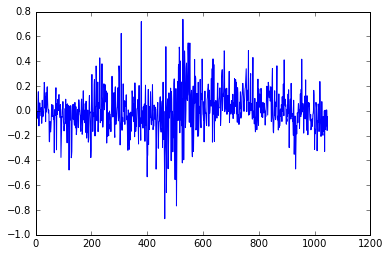

In [240]:
plt.plot(np.mean(signal, axis=0))

In [235]:
#load the AFNI extracted thalamus timeseries
afni_ts = np.loadtxt("thalamus_voxel_ts.txt")

In [236]:
afni_ts.shape

(1047, 199)

In [237]:
afni_ts = afni_ts.T[3:] #remove coordinate markers x, y, z 
afni_ts.shape

(196, 1047)

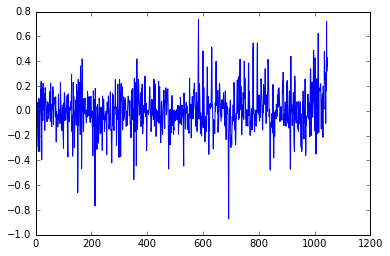

In [241]:
plt.plot(np.mean(afni_ts, axis=0))

In [239]:
np.array_equal(np.round(signal, 2), np.round(afni_ts, 2))

False

In [ ]:
"""Manual masking and timeseries extraction"""

In [204]:
def extract_voxels(image, mask):
    xs, ys, zs = np.nonzero(mask)
    result = np.zeros((len(xs), image.shape[-1]))
    for i in range(len(xs)):
        voxel_ts = image[xs[i]][ys[i]][zs[i]] #196
        result[i] = voxel_ts
    return result

In [205]:
r = extract_voxels(img_data, thalamus_mask_data)

In [209]:
r.T.shape

(196, 1047)

In [220]:
#manual extraction agrees with AFNI extraction
np.round(np.mean(r.T, 1), 3) == np.round(np.mean(afni_ts, 1), 3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,